In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
df = pd.read_excel('E:/Code/STAT3013.-P12_Nhom4/Dataset/Gold_data_filtered.xlsx')

In [3]:

# Add an 'index' column explicitly to use as a feature, starting from 1
df['index'] = df.index + 1

In [4]:
# Display the first few rows
print(df.head())

# Check for any missing values
print(df.isnull().sum())

        date         open         high          low        close  volume  \
0 2019-03-01  1312.199951  1312.199951  1288.900024  1296.400024     110   
1 2019-03-04  1285.500000  1287.000000  1281.900024  1284.800049      28   
2 2019-03-05  1287.000000  1287.000000  1282.000000  1282.000000     114   
3 2019-03-06  1287.099976  1287.099976  1282.599976  1284.900024      14   
4 2019-03-07  1281.000000  1284.599976  1281.000000  1283.800049      11   

   index  
0      1  
1      2  
2      3  
3      4  
4      5  
date      0
open      0
high      0
low       0
close     0
volume    0
index     0
dtype: int64


In [5]:
# Normalize the 'index' column to improve model performance
scaler = StandardScaler()
df['index_normalized'] = scaler.fit_transform(df[['index']])

In [6]:
# Check the data types of all columns in the DataFrame
print(df.dtypes)


date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
index                        int64
index_normalized           float64
dtype: object



SPLITING DATA 7-2-1


In [7]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [9]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [10]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [11]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1340      2125.159328
1    1341      2125.642415
2    1342      2126.125502
3    1343      2126.608589
4    1344      2127.091676
5    1345      2127.574763
6    1346      2128.057849
7    1347      2128.540936
8    1348      2129.024023
9    1349      2129.507110
10   1350      2129.990197
11   1351      2130.473283
12   1352      2130.956370
13   1353      2131.439457
14   1354      2131.922544
15   1355      2132.405631
16   1356      2132.888717
17   1357      2133.371804
18   1358      2133.854891
19   1359      2134.337978
20   1360      2134.821065
21   1361      2135.304152
22   1362      2135.787238
23   1363      2136.270325
24   1364      2136.753412
25   1365      2137.236499
26   1366      2137.719586
27   1367      2138.202672
28   1368      2138.685759
29   1369      2139.168846


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 106.92699449763697
RMSE: 136.18618814868242
MAPE: 0.06413563972102361

Test Set Performance:
MAE: 82.08485561977247
RMSE: 97.53722949420562
MAPE: 0.043746627742399485

Validation Set Performance:
MAE: 128.95313138178523
RMSE: 158.25115360379274
MAPE: 0.056708715833403894


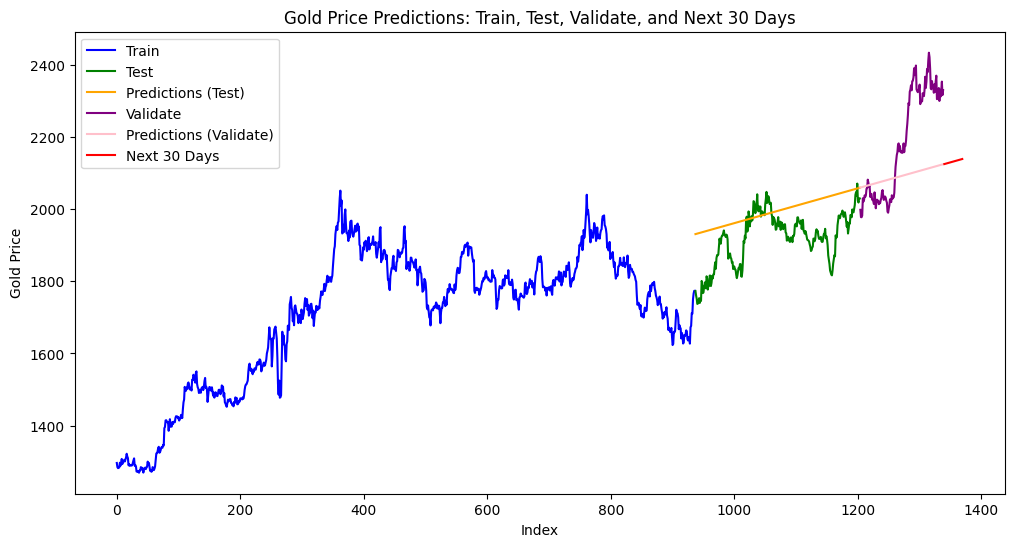

In [13]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


In [14]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2681.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          9.14e-322
Time:                        23:15:25   Log-Likelihood:                -8435.8
No. Observations:                1339   AIC:                         1.688e+04
Df Residuals:                    1337   BIC:                         1.689e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1472.5513      7.204    204.416      0.0

I. Analyze Residuals (7:2:1)

1. Residual Plot

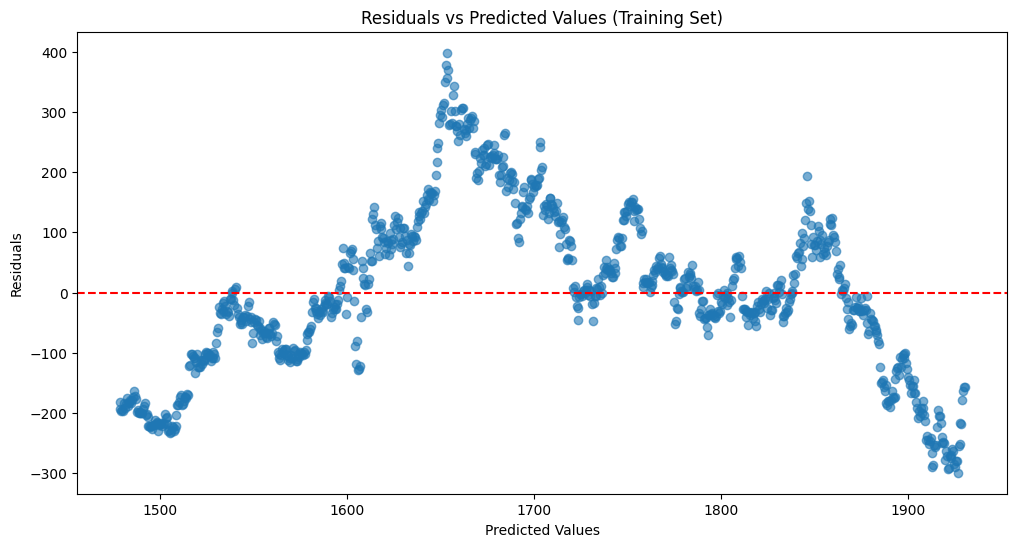

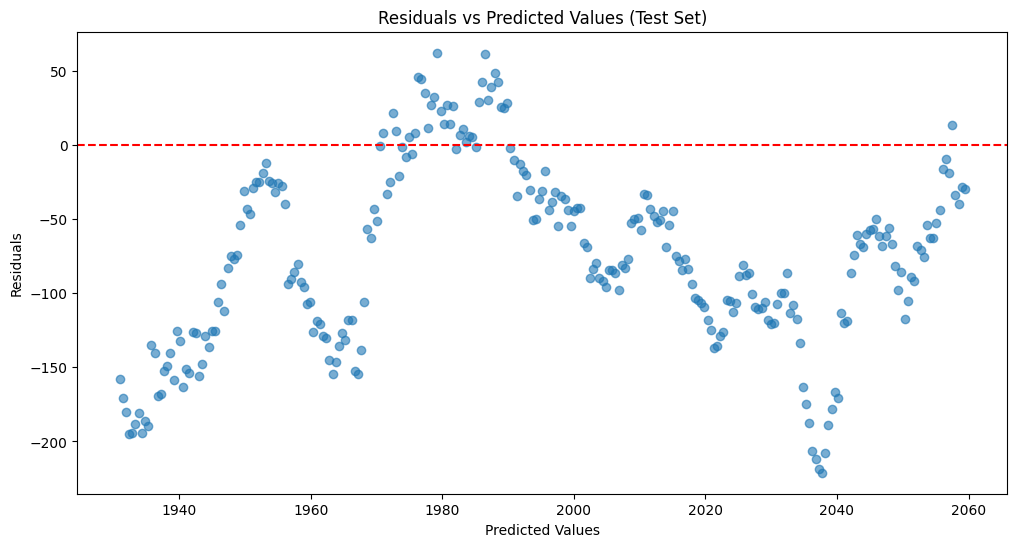

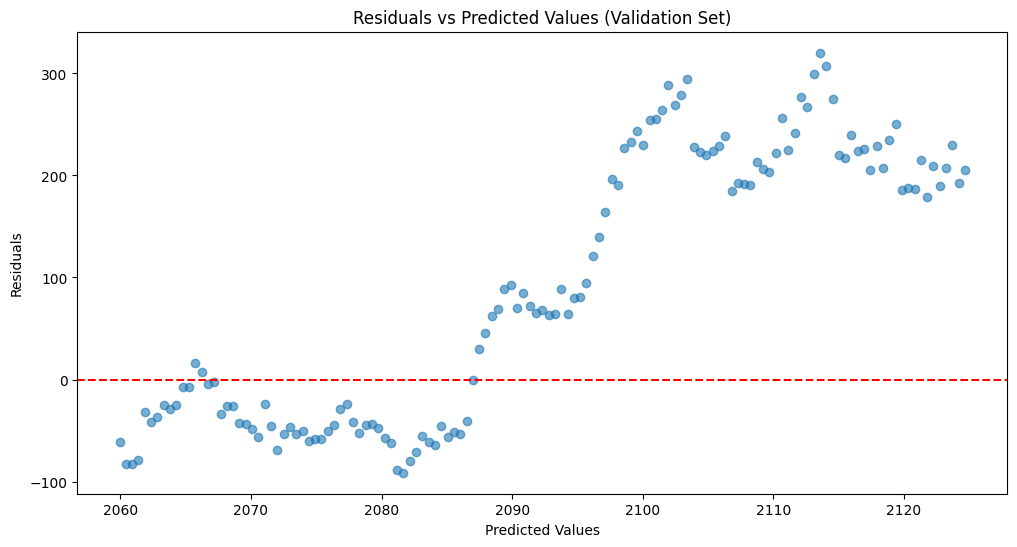

In [15]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()


2. Q-Q PLOT

<Figure size 800x600 with 0 Axes>

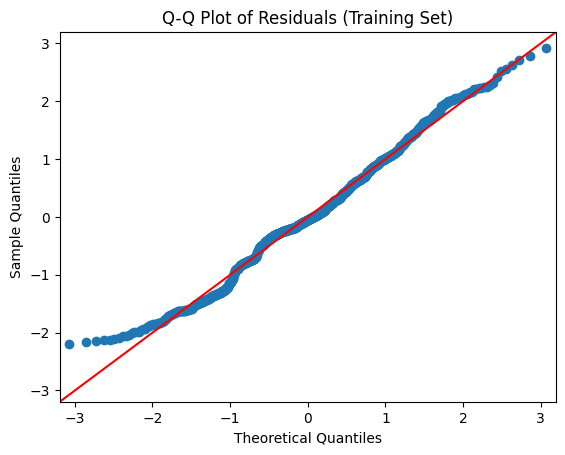

<Figure size 800x600 with 0 Axes>

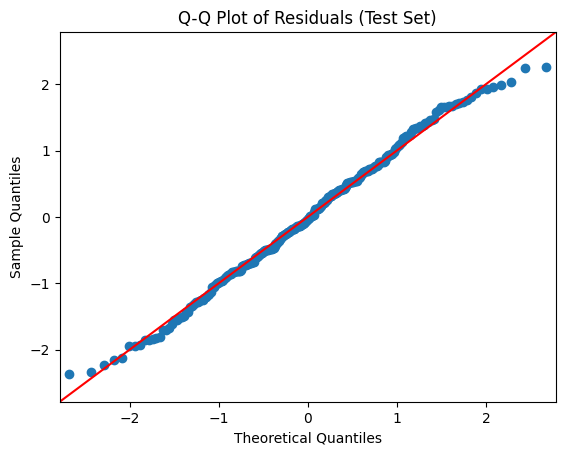

<Figure size 800x600 with 0 Axes>

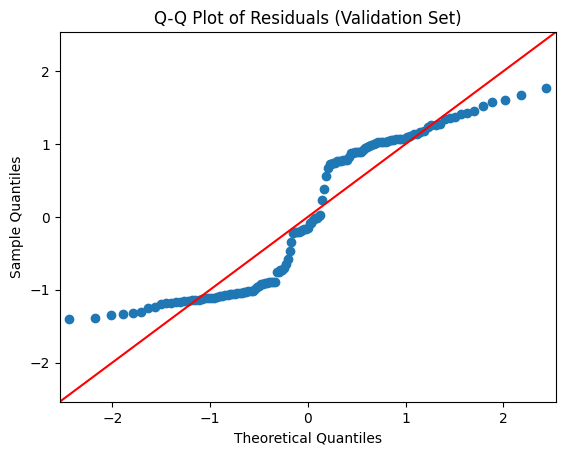

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()


3. Durbin-Watson

In [17]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)


Durbin-Watson statistic (Training Set): 0.017526005927738897
Durbin-Watson statistic (Test Set): 0.027674840265253305
Durbin-Watson statistic (Validation Set): 0.016184953677937975


SPLITING DATA 6-3-1

In [18]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [19]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [20]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [21]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [22]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1340      2367.621897
1    1341      2368.336335
2    1342      2369.050772
3    1343      2369.765210
4    1344      2370.479647
5    1345      2371.194085
6    1346      2371.908522
7    1347      2372.622959
8    1348      2373.337397
9    1349      2374.051834
10   1350      2374.766272
11   1351      2375.480709
12   1352      2376.195147
13   1353      2376.909584
14   1354      2377.624022
15   1355      2378.338459
16   1356      2379.052896
17   1357      2379.767334
18   1358      2380.481771
19   1359      2381.196209
20   1360      2381.910646
21   1361      2382.625084
22   1362      2383.339521
23   1363      2384.053959
24   1364      2384.768396
25   1365      2385.482833
26   1366      2386.197271
27   1367      2386.911708
28   1368      2387.626146
29   1369      2388.340583


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 92.26528805767514
RMSE: 113.84177885376599
MAPE: 0.05450652166609817

Test Set Performance:
MAE: 266.2347572457429
RMSE: 277.043102226487
MAPE: 0.14520891241254577

Validation Set Performance:
MAE: 145.85168271962135
RMSE: 182.43914568442278
MAPE: 0.07040996512179125


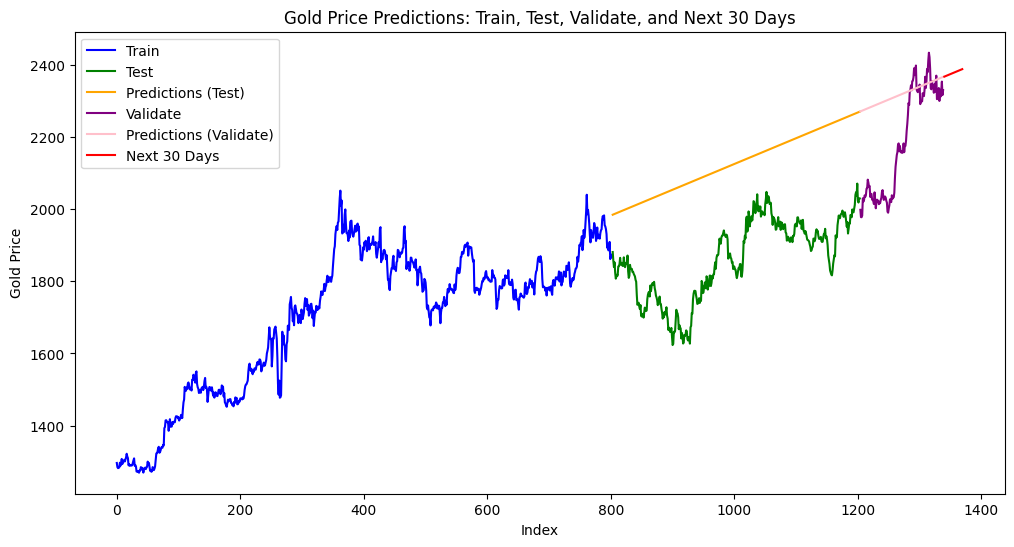

In [24]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


In [25]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2681.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          9.14e-322
Time:                        23:15:26   Log-Likelihood:                -8435.8
No. Observations:                1339   AIC:                         1.688e+04
Df Residuals:                    1337   BIC:                         1.689e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1472.5513      7.204    204.416      0.0

I. Analyze Residuals (6:3:1)

1. Residual Plot

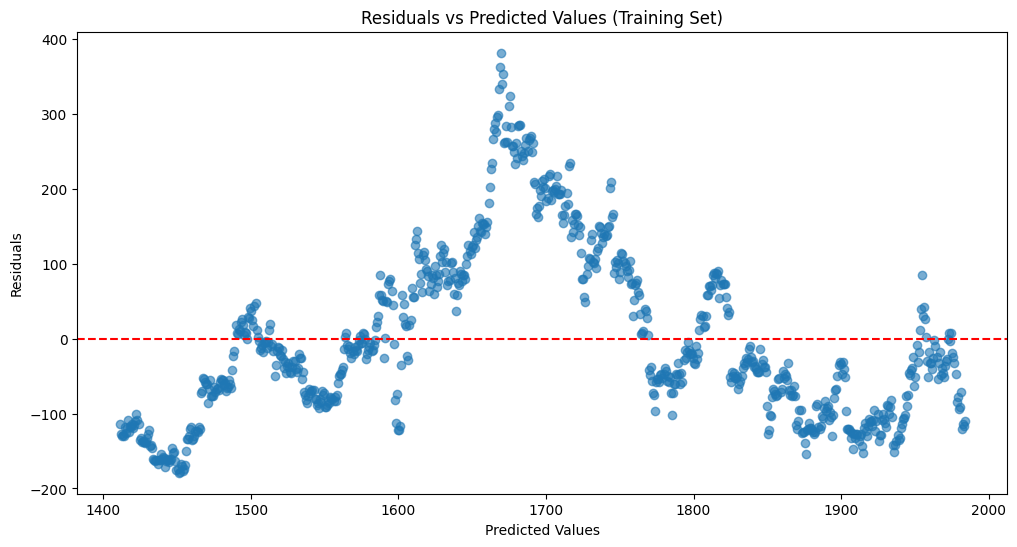

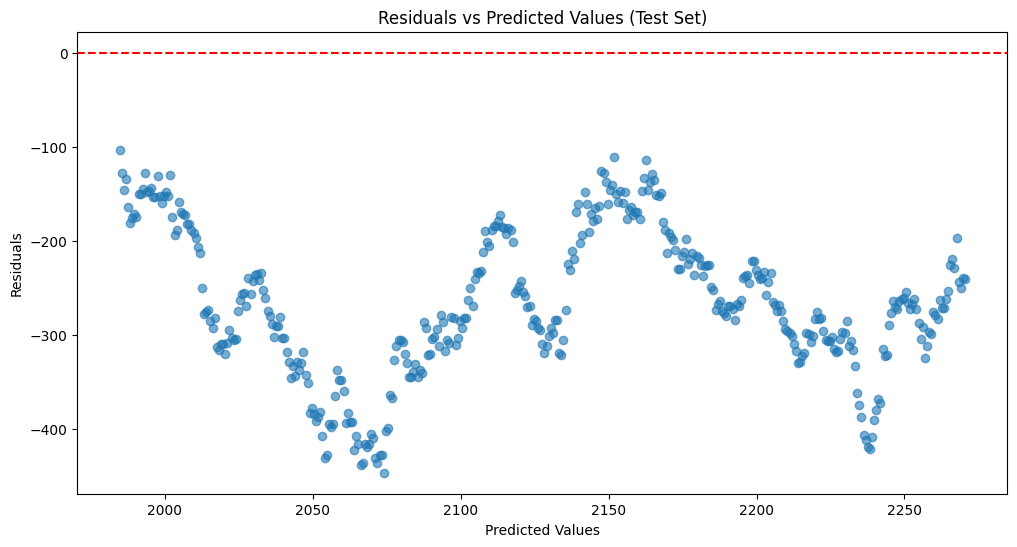

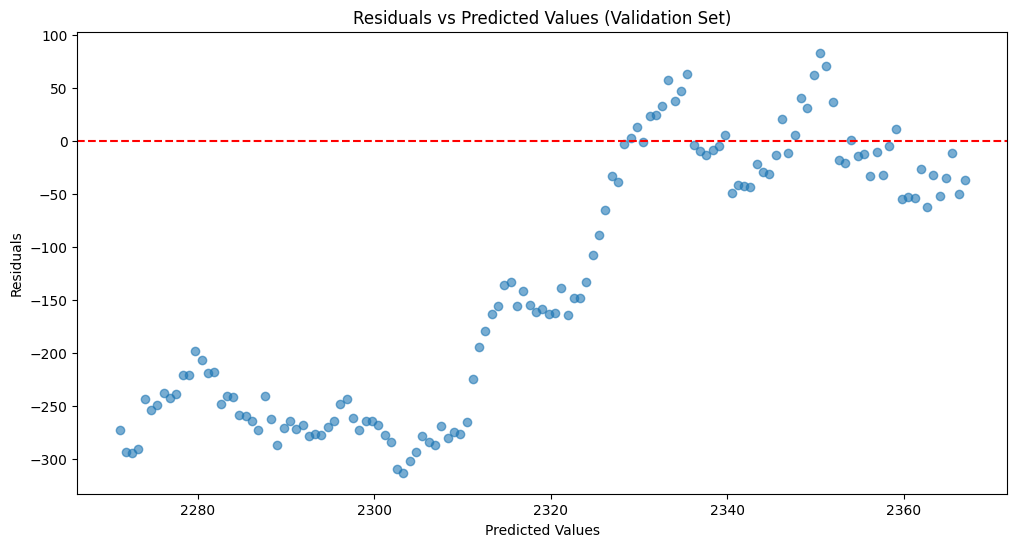

In [26]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()


2. Q-Q PLOTS

<Figure size 800x600 with 0 Axes>

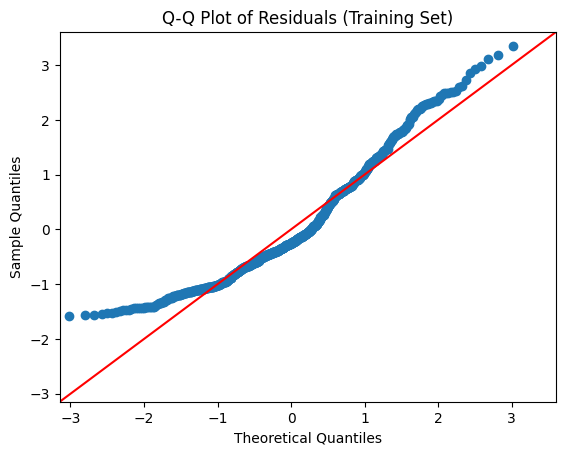

<Figure size 800x600 with 0 Axes>

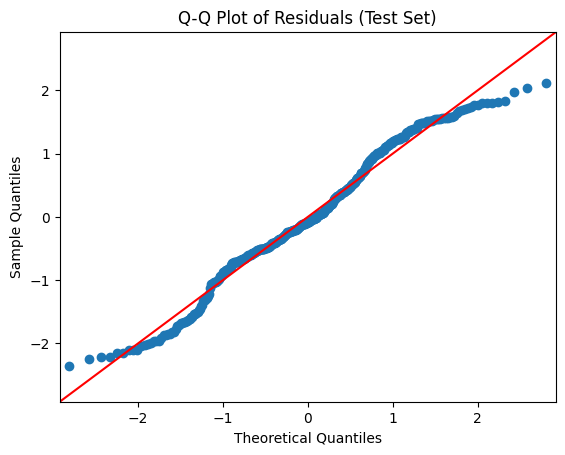

<Figure size 800x600 with 0 Axes>

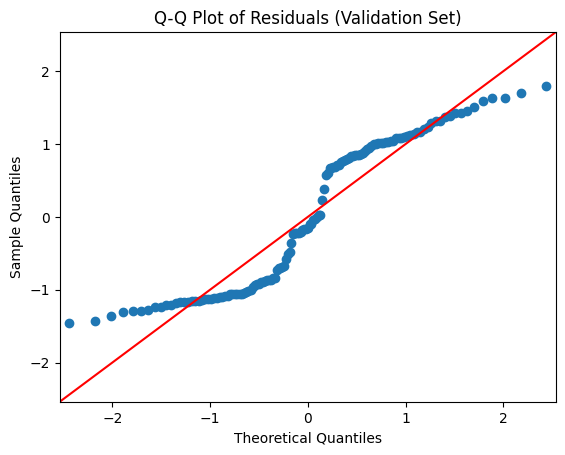

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()


3. Durbin-Watson

In [28]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)


Durbin-Watson statistic (Training Set): 0.025981063715549414
Durbin-Watson statistic (Test Set): 0.0033933711647523065
Durbin-Watson statistic (Validation Set): 0.012151914698844428


SPLITING DATA 5-3-2

In [29]:
# Split the data into training, testing, and validation sets (5:3:2)
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [30]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [31]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [32]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [33]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1340      2543.676369
1    1341      2544.550746
2    1342      2545.425122
3    1343      2546.299499
4    1344      2547.173875
5    1345      2548.048252
6    1346      2548.922628
7    1347      2549.797005
8    1348      2550.671381
9    1349      2551.545758
10   1350      2552.420135
11   1351      2553.294511
12   1352      2554.168888
13   1353      2555.043264
14   1354      2555.917641
15   1355      2556.792017
16   1356      2557.666394
17   1357      2558.540770
18   1358      2559.415147
19   1359      2560.289523
20   1360      2561.163900
21   1361      2562.038276
22   1362      2562.912653
23   1363      2563.787030
24   1364      2564.661406
25   1365      2565.535783
26   1366      2566.410159
27   1367      2567.284536
28   1368      2568.158912
29   1369      2569.033289


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 91.9560640981841
RMSE: 112.71645776409507
MAPE: 0.05437717507829756

Test Set Performance:
MAE: 298.49303178007466
RMSE: 323.8777416958465
MAPE: 0.1656110473623905

Validation Set Performance:
MAE: 363.05859223740015
RMSE: 379.063689747421
MAPE: 0.18079314210176287


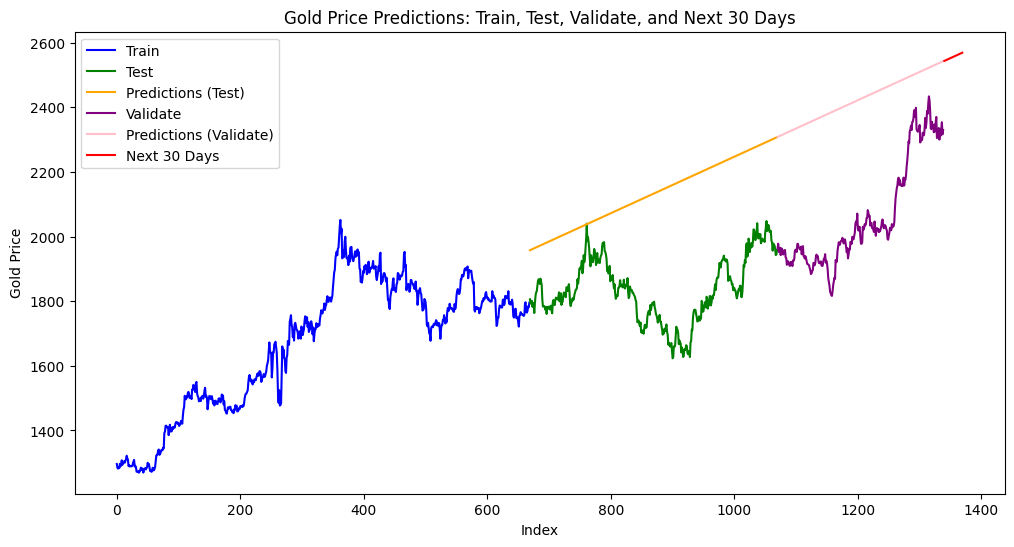

In [35]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


In [36]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2681.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          9.14e-322
Time:                        23:15:27   Log-Likelihood:                -8435.8
No. Observations:                1339   AIC:                         1.688e+04
Df Residuals:                    1337   BIC:                         1.689e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1472.5513      7.204    204.416      0.0

I. Analyze Residuals (5:3:2)

1. Residual Plot

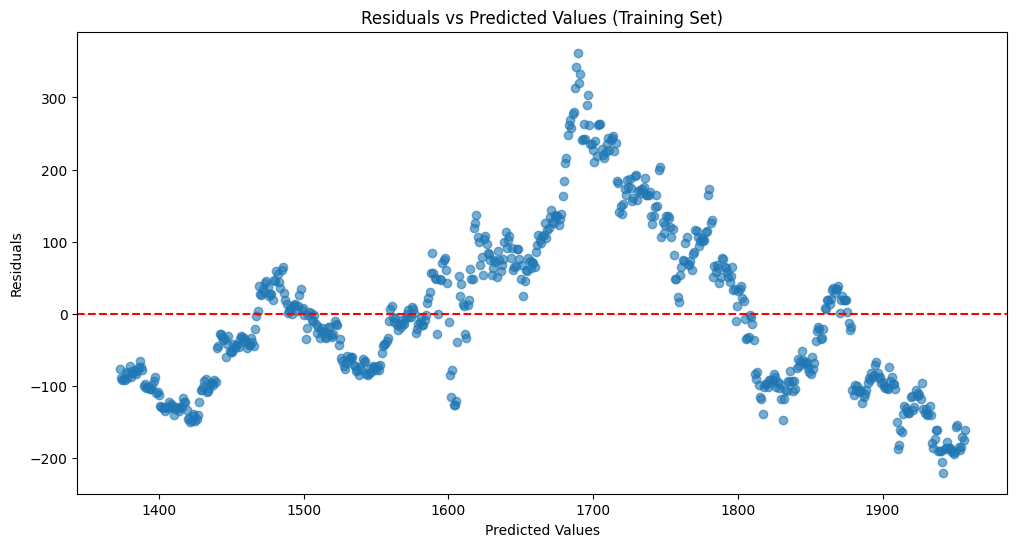

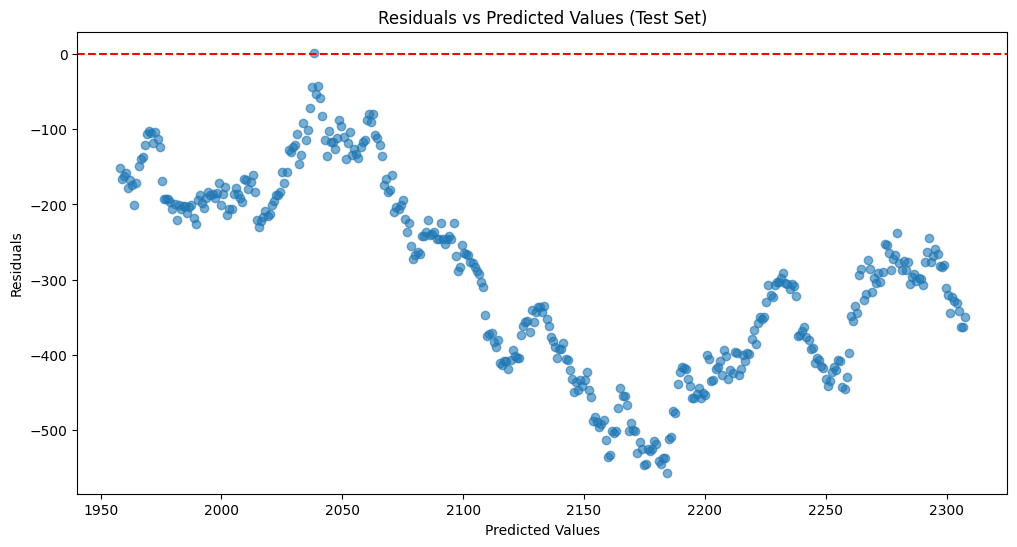

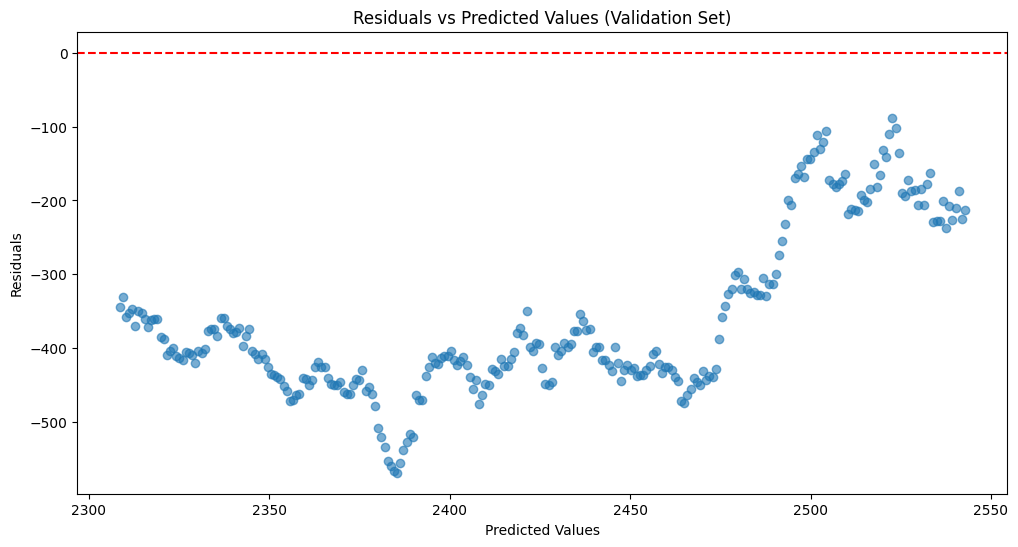

In [37]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()

2. Q-Q PLOTS:

<Figure size 800x600 with 0 Axes>

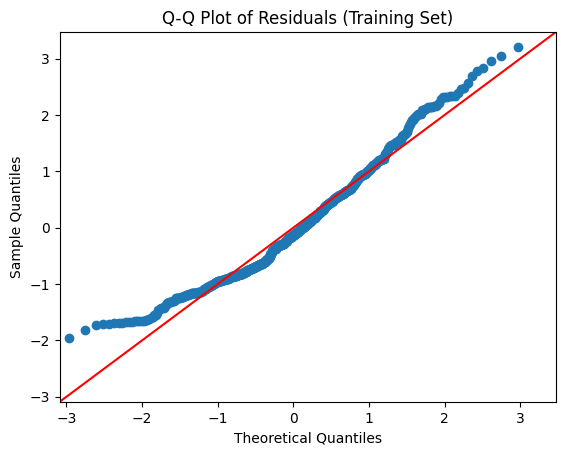

<Figure size 800x600 with 0 Axes>

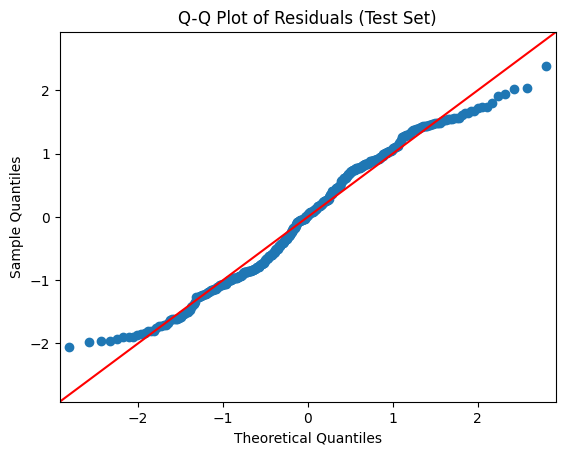

<Figure size 800x600 with 0 Axes>

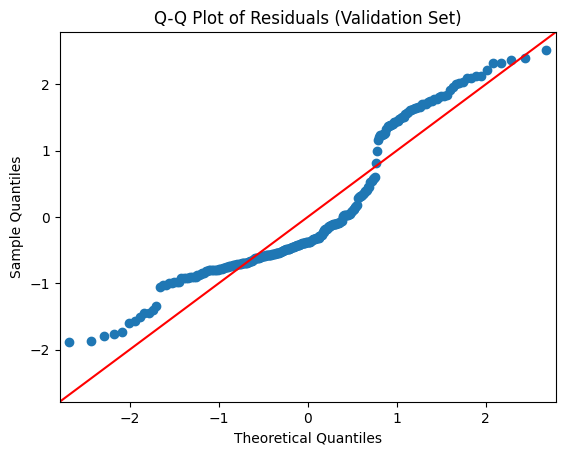

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()

3. Durbin-Watson:


In [39]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)

Durbin-Watson statistic (Training Set): 0.026545787443613727
Durbin-Watson statistic (Test Set): 0.0029237424036987238
Durbin-Watson statistic (Validation Set): 0.0021160178859289357
